## Importing the usual suspects

In [108]:
import numpy as np
import pandas as pd
import os

# EDA tools
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

palette = sns.color_palette()

import plotly.offline as py
py.init_notebook_mode(connected=True) #Use plotly.js CDN
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
import cufflinks as cf
cf.set_config_file(offline=True)

In [109]:
DATA_DIR = './data/'

In [110]:
print('# File sizes')
for f in os.listdir(DATA_DIR):
    if not os.path.isdir(DATA_DIR + f):
        print(f.ljust(30) + str(round(os.path.getsize(DATA_DIR + f) / 1000000, 2)) + 'MB')
    else:
        sizes = [os.path.getsize(DATA_DIR+f+'/'+x)/1000000 for x in os.listdir(DATA_DIR + f)]
        print(f.ljust(30) + str(round(sum(sizes), 2)) + 'MB' + ' ({} files)'.format(len(sizes)))

# File sizes
.DS_Store                     0.01MB
census_income_learn.csv       103.87MB
census_income_metadata.txt    0.01MB
census_income_test.csv        51.92MB


## Loading the dataset

In [111]:
TRAIN_DATA = DATA_DIR + 'census_income_learn.csv'

In [112]:
df_train = pd.read_csv(TRAIN_DATA)
df_train.head()

73                  Not in universe   0   0.1         High school graduate  \
0  58   Self-employed-not incorporated   4    34   Some college but no degree   
1  18                  Not in universe   0     0                   10th grade   
2   9                  Not in universe   0     0                     Children   
3  10                  Not in universe   0     0                     Children   
4  48                          Private  40    10   Some college but no degree   

    0.2  Not in universe.1                           Widowed  \
0     0    Not in universe                          Divorced   
1     0        High school                     Never married   
2     0    Not in universe                     Never married   
3     0    Not in universe                     Never married   
4  1200    Not in universe   Married-civilian spouse present   

    Not in universe or children                     Not in universe.2  \
0                  Construction   Precision production craft & repair   
1   Not in universe or children                       Not in universe   
2   Not in universe or children                       Not in universe   
3   Not in universe or children                       Not in universe   
4                 Entertainment                Professional specialty   

     ...       United-States  United-States.1  United-States.2  \
0    ...       United-States    United-States    United-States   
1    ...             Vietnam          Vietnam          Vietnam   
2    ...       United-States    United-States    United-States   
3    ...       United-States    United-States    United-States   
4    ...         Philippines    United-States    United-States   

      Native- Born in the United States  0.7  Not in universe.8   2   0.8  \
0     Native- Born in the United States    0    Not in universe   2    52   
1   Foreign born- Not a citizen of U S     0    Not in universe   2     0   
2     Native- Born in the United States    0    Not in universe   0     0   
3     Native- Born in the United States    0    Not in universe   0     0   
4     Native- Born in the United States    2    Not in universe   2    52   

    95   - 50000.  
0   94   - 50000.  
1   95   - 50000.  
2   94   - 50000.  
3   94   - 50000.  
4   95   - 50000.  

[5 rows x 42 columns]

Seems like there is no column name at all.
Copy pasting from the metadata file.

Use regular expression to replace "| COLNAME \t\t\t... CODE"
- match "| " with "^| "
- match any number of tabs with \t+
- match end of line with \n

In [113]:
col_name = ["age - AAGE",
"class of worker - ACLSWKR",
"industry code - ADTIND",
"occupation code - ADTOCC",
"adjusted gross income - AGI",
"education - AHGA",
"wage per hour - AHRSPAY",
"enrolled in edu inst last wk - AHSCOL",
"marital status - AMARITL",
"major industry code - AMJIND",
"major occupation code - AMJOCC",
"mace - ARACE",
"hispanic Origin - AREORGN",
"sex - ASEX",
"member of a labor union - AUNMEM",
"reason for unemployment - AUNTYPE",
"full or part time employment stat - AWKSTAT",
"capital gains - CAPGAIN",
"capital losses - CAPLOSS",
"divdends from stocks - DIVVAL",
"federal income tax liability - FEDTAX",
"tax filer status - FILESTAT",
"region of previous residence - GRINREG",
"state of previous residence - GRINST",
"detailed household and family stat - HHDFMX",
"detailed household summary in household - HHDREL",
"instance weight - MARSUPWT",
"migration code-change in msa - MIGMTR1",
"migration code-change in reg - MIGMTR3",
"migration code-move within reg - MIGMTR4",
"live in this house 1 year ago - MIGSAME",
"migration prev res in sunbelt - MIGSUN",
"num persons worked for employer - NOEMP",
"family members under 18 - PARENT",
"total person earnings - PEARNVAL",
"country of birth father - PEFNTVTY",
"country of birth mother - PEMNTVTY",
"country of birth self - PENATVTY",
"citizenship - PRCITSHP",
"total person income - PTOTVAL",
"own business or self employed - SEOTR",
"taxable income amount - TAXINC",
"fill inc questionnaire for veteran's admin - VETQVA",
"veterans benefits - VETYN",
"weeks worked in year - WKSWORK"]

In [114]:
df_train = pd.read_csv(TRAIN_DATA, names=col_name)
df_train.head(30)

age - AAGE        class of worker - ACLSWKR  industry code - ADTIND  \
0           73                  Not in universe                       0   
1           58   Self-employed-not incorporated                       4   
2           18                  Not in universe                       0   
3            9                  Not in universe                       0   
4           10                  Not in universe                       0   
5           48                          Private                      40   
6           42                          Private                      34   
7           28                          Private                       4   
8           47                 Local government                      43   
9           34                          Private                       4   
10           8                  Not in universe                       0   
11          32                  Not in universe                       0   
12          51                          Private                       4   
13          46                          Private                      37   
14          26                          Private                      24   
15          13                  Not in universe                       0   
16          47                          Private                      39   
17          39                  Not in universe                       0   
18          16                  Not in universe                       0   
19          35                          Private                      12   
20          12                  Not in universe                       0   
21          27   Self-employed-not incorporated                       4   
22          56                          Private                      35   
23          46                          Private                      45   
24          55                  Not in universe                       0   
25           2                  Not in universe                       0   
26           1                  Not in universe                       0   
27          37                          Private                       3   
28           4                  Not in universe                       0   
29          37                          Private                       4   

    occupation code - ADTOCC              adjusted gross income - AGI  \
0                          0                     High school graduate   
1                         34               Some college but no degree   
2                          0                               10th grade   
3                          0                                 Children   
4                          0                                 Children   
5                         10               Some college but no degree   
6                          3               Bachelors degree(BA AB BS)   
7                         40                     High school graduate   
8                         26               Some college but no degree   
9                         37               Some college but no degree   
10                         0                                 Children   
11                         0                     High school graduate   
12                        34               Some college but no degree   
13                        31                     High school graduate   
14                        12               Bachelors degree(BA AB BS)   
15                         0                                 Children   
16                        36               Bachelors degree(BA AB BS)   
17                         0                               10th grade   
18                         0                               10th grade   
19                        41                     High school graduate   
20                         0                                 Children   
21                        34               Some college but no degree   

Order of columns does not match (example wage per hour and the last 3 columns). Rechecking

In [115]:
col_name = ["age - AAGE",
"class of worker - ACLSWKR",
"industry code - ADTIND",
"occupation code - ADTOCC",
# "adjusted gross income - AGI", # Omitted in DATA
"education - AHGA",
"wage per hour - AHRSPAY",
"enrolled in edu inst last wk - AHSCOL",
"marital status - AMARITL",
"major industry code - AMJIND",
"major occupation code - AMJOCC",
"race - ARACE", # typo mace -> race
"hispanic Origin - AREORGN",
"sex - ASEX",
"member of a labor union - AUNMEM",
"reason for unemployment - AUNTYPE",
"full or part time employment stat - AWKSTAT",
"capital gains - CAPGAIN",
"capital losses - CAPLOSS",
"divdends from stocks - DIVVAL", # typo divdends --> dividends
# "federal income tax liability - FEDTAX",  # Omitted in DATA
"tax filer status - FILESTAT",
"region of previous residence - GRINREG",
"state of previous residence - GRINST",
"detailed household and family stat - HHDFMX",
"detailed household summary in household - HHDREL",
"instance weight - MARSUPWT",
"migration code-change in msa - MIGMTR1",
"migration code-change in reg - MIGMTR3",
"migration code-move within reg - MIGMTR4",
"live in this house 1 year ago - MIGSAME",
"migration prev res in sunbelt - MIGSUN",
"num persons worked for employer - NOEMP",
"family members under 18 - PARENT",
# "total person earnings - PEARNVAL",  # Omitted in DATA
"country of birth father - PEFNTVTY",
"country of birth mother - PEMNTVTY",
"country of birth self - PENATVTY",
"citizenship - PRCITSHP",
# "total person income - PTOTVAL",  # Omitted in DATA
"own business or self employed - SEOTR",
# "taxable income amount - TAXINC",  # Omitted in DATA
"fill inc questionnaire for veteran's admin - VETQVA",
"veterans benefits - VETYN",
"weeks worked in year - WKSWORK",
"year", # New added
"target - Income 50k"
]


df_train = pd.read_csv(TRAIN_DATA, names=col_name, index_col=False)
df_train.head(30)

age - AAGE        class of worker - ACLSWKR  industry code - ADTIND  \
0           73                  Not in universe                       0   
1           58   Self-employed-not incorporated                       4   
2           18                  Not in universe                       0   
3            9                  Not in universe                       0   
4           10                  Not in universe                       0   
5           48                          Private                      40   
6           42                          Private                      34   
7           28                          Private                       4   
8           47                 Local government                      43   
9           34                          Private                       4   
10           8                  Not in universe                       0   
11          32                  Not in universe                       0   
12          51                          Private                       4   
13          46                          Private                      37   
14          26                          Private                      24   
15          13                  Not in universe                       0   
16          47                          Private                      39   
17          39                  Not in universe                       0   
18          16                  Not in universe                       0   
19          35                          Private                      12   
20          12                  Not in universe                       0   
21          27   Self-employed-not incorporated                       4   
22          56                          Private                      35   
23          46                          Private                      45   
24          55                  Not in universe                       0   
25           2                  Not in universe                       0   
26           1                  Not in universe                       0   
27          37                          Private                       3   
28           4                  Not in universe                       0   
29          37                          Private                       4   

    occupation code - ADTOCC                         education - AHGA  \
0                          0                     High school graduate   
1                         34               Some college but no degree   
2                          0                               10th grade   
3                          0                                 Children   
4                          0                                 Children   
5                         10               Some college but no degree   
6                          3               Bachelors degree(BA AB BS)   
7                         40                     High school graduate   
8                         26               Some college but no degree   
9                         37               Some college but no degree   
10                         0                                 Children   
11                         0                     High school graduate   
12                        34               Some college but no degree   
13                        31                     High school graduate   
14                        12               Bachelors degree(BA AB BS)   
15                         0                                 Children   
16                        36               Bachelors degree(BA AB BS)   
17                         0                               10th grade   
18                         0                               10th grade   
19                        41                     High school graduate   
20                         0                                 Children   
21                        34               Some college but no degree   

## Categorical variables distribution plot

In [116]:
categorical_name = [
# "age - AAGE",
"class of worker - ACLSWKR",
"industry code - ADTIND",
"occupation code - ADTOCC",
"education - AHGA",
# "wage per hour - AHRSPAY",
"enrolled in edu inst last wk - AHSCOL",
"marital status - AMARITL",
"major industry code - AMJIND",
"major occupation code - AMJOCC",
"race - ARACE",
"hispanic Origin - AREORGN",
"sex - ASEX",
"member of a labor union - AUNMEM",
"reason for unemployment - AUNTYPE",
"full or part time employment stat - AWKSTAT",
# "capital gains - CAPGAIN",
# "capital losses - CAPLOSS",
#"dividends from stocks - DIVVAL",
"tax filer status - FILESTAT",
"region of previous residence - GRINREG",
"state of previous residence - GRINST",
"detailed household and family stat - HHDFMX",
"detailed household summary in household - HHDREL",
# "instance weight - MARSUPWT",
"migration code-change in msa - MIGMTR1",
"migration code-change in reg - MIGMTR3",
"migration code-move within reg - MIGMTR4",
"live in this house 1 year ago - MIGSAME",
"migration prev res in sunbelt - MIGSUN",
# "num persons worked for employer - NOEMP",
"family members under 18 - PARENT",
"country of birth father - PEFNTVTY",
"country of birth mother - PEMNTVTY",
"country of birth self - PENATVTY",
"citizenship - PRCITSHP",
"own business or self employed - SEOTR",
"fill inc questionnaire for veteran's admin - VETQVA",
"veterans benefits - VETYN",
# "weeks worked in year - WKSWORK",
"year",
"target - Income 50k"
]

## Plotting

Plotting bar chart for categoricals
and histograms for continuous variables

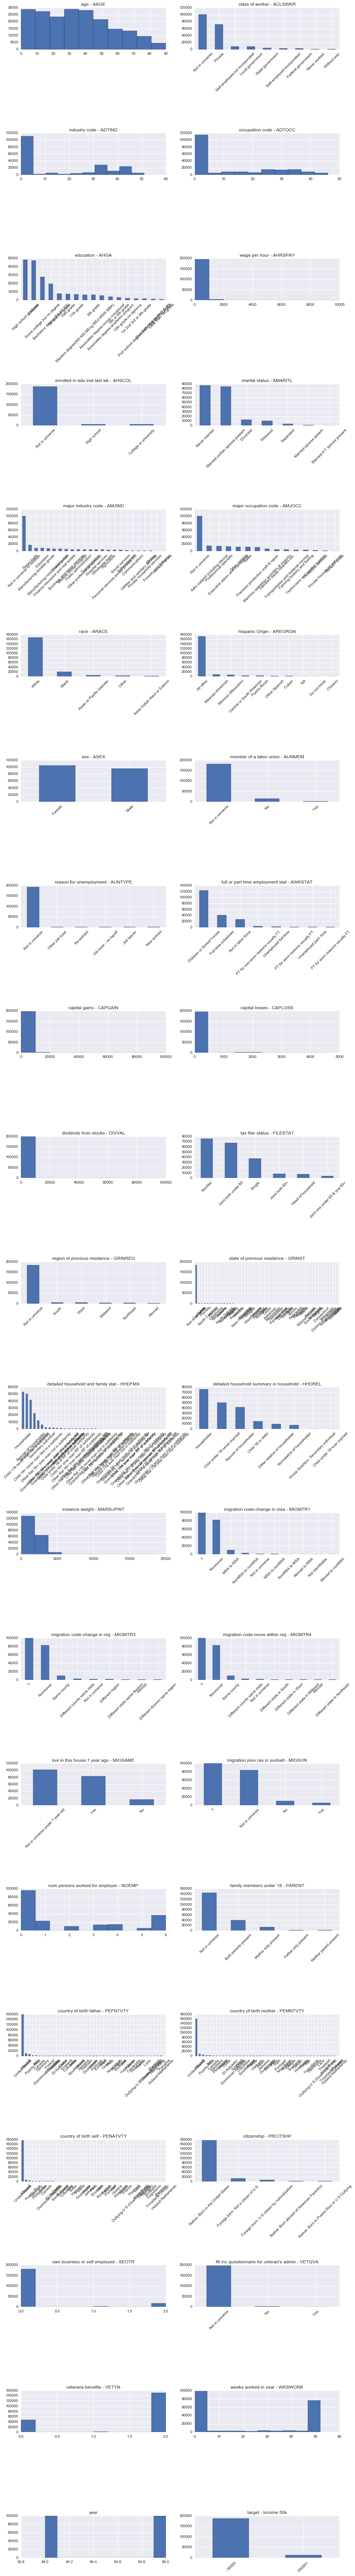

In [117]:
fig = plt.figure(figsize=(15,120))
cols = 2
rows = np.ceil(df_train.shape[1] / cols)


for i, column in enumerate(df_train.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    if df_train.dtypes[column] == np.object:
        df_train[column].value_counts().plot(kind="bar", axes=ax)
        plt.xticks(rotation=45)
    else:
        df_train[column].hist(axes=ax)
        # plt.xticks(rotation=45)
plt.subplots_adjust(hspace=2, wspace=0.2)

## Distribution and heatmap of continuous variables

In [158]:
df_train.describe()

age - AAGE  industry code - ADTIND  occupation code - ADTOCC  \
count  199523.000000           199523.000000             199523.000000   
mean       34.494199               15.352320                 11.306556   
std        22.310895               18.067129                 14.454204   
min         0.000000                0.000000                  0.000000   
25%        15.000000                0.000000                  0.000000   
50%        33.000000                0.000000                  0.000000   
75%        50.000000               33.000000                 26.000000   
max        90.000000               51.000000                 46.000000   

       wage per hour - AHRSPAY  capital gains - CAPGAIN  \
count            199523.000000             199523.00000   
mean                 55.426908                434.71899   
std                 274.896454               4697.53128   
min                   0.000000                  0.00000   
25%                   0.000000                  0.00000   
50%                   0.000000                  0.00000   
75%                   0.000000                  0.00000   
max                9999.000000              99999.00000   

       capital losses - CAPLOSS  divdends from stocks - DIVVAL  \
count             199523.000000                  199523.000000   
mean                  37.313788                     197.529533   
std                  271.896428                    1984.163658   
min                    0.000000                       0.000000   
25%                    0.000000                       0.000000   
50%                    0.000000                       0.000000   
75%                    0.000000                       0.000000   
max                 4608.000000                   99999.000000   

       instance weight - MARSUPWT  num persons worked for employer - NOEMP  \
count               199523.000000                            199523.000000   
mean                  1740.380269                                 1.956180   
std                    993.768156                                 2.365126   
min                     37.870000                                 0.000000   
25%                   1061.615000                                 0.000000   
50%                   1618.310000                                 1.000000   
75%                   2188.610000                                 4.000000   
max                  18656.300000                                 6.000000   

       own business or self employed - SEOTR  veterans benefits - VETYN  \
count                          199523.000000              199523.000000   
mean                                0.175438                   1.514833   
std                                 0.553694                   0.851473   
min                                 0.000000                   0.000000   
25%                                 0.000000                   2.000000   
50%                                 0.000000                   2.000000   
75%                                 0.000000                   2.000000   
max                                 2.000000                   2.000000   

       weeks worked in year - WKSWORK           year  
count                   199523.000000  199523.000000  
mean                        23.174897      94.499672  
std                         24.411488       0.500001  
min                          0.000000      94.000000  
25%                          0.000000      94.000000  
50%                          8.000000      94.000000  
75%                         52.000000      95.000000  
max                         52.000000      95.000000

In [172]:
df_train.corr().iplot(kind='heatmap', colorscale='paired')

## Zoom on target label

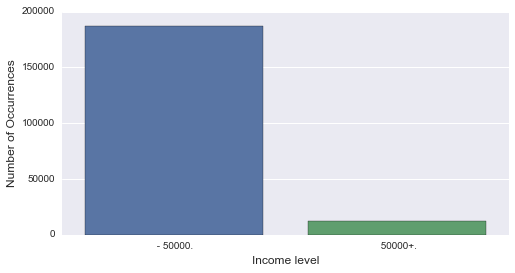

In [179]:
inc_level = df_train['target - Income 50k'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(inc_level.index, inc_level.values)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Income level', fontsize=12)
plt.show()

## Zoom on specific features

### Starting with worker class

In [120]:
df_train['class of worker - ACLSWKR'].value_counts().iplot(kind='bar', title='Class of Workers')

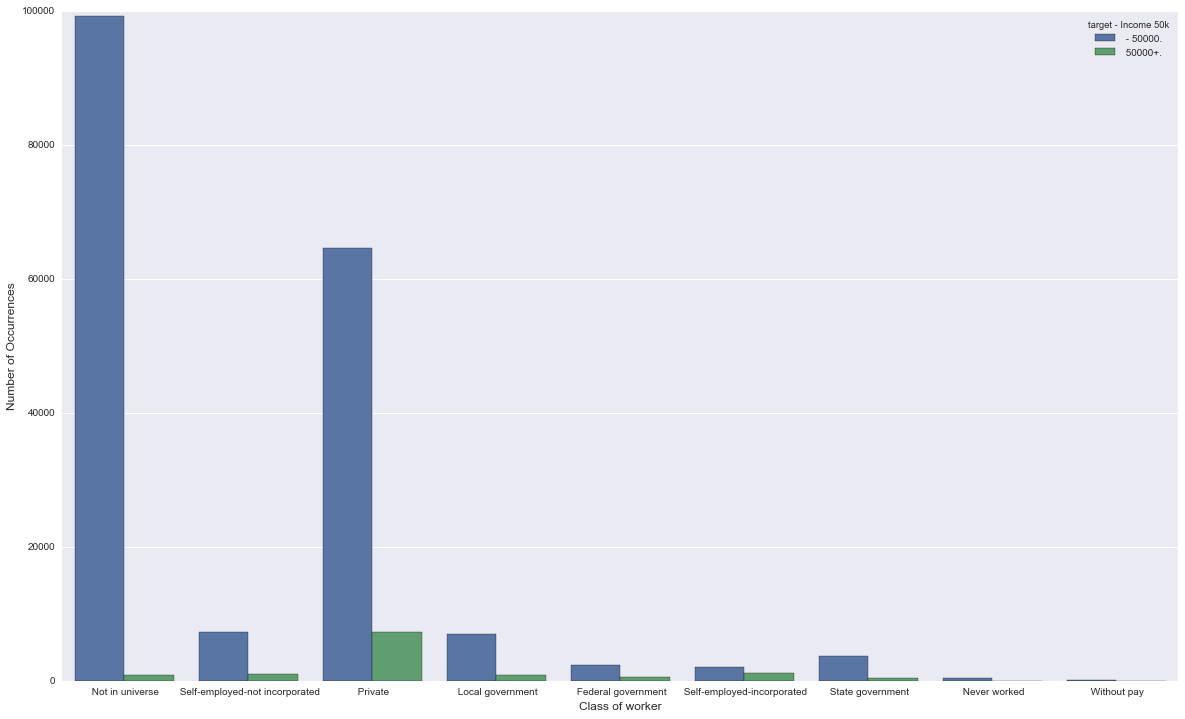

In [183]:
plt.figure(figsize=(20,12))
sns.countplot(x='class of worker - ACLSWKR', hue='target - Income 50k', data=df_train)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Class of worker', fontsize=12)
plt.show()